In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
from patsy import dmatrices

In [21]:
df = pd.read_csv('train_data_x1.csv',header=0)
df['win_pct_diff'] = df['A_PCT'] - df['B_PCT']
df['rpi_diff'] = df['A_RPI'] - df['B_RPI']
df['team_rating_diff'] = df['TEAM_RATING'] - df['TEAM_RATING_1']

In [22]:
from keras.utils import np_utils

y, X = dmatrices('TEAMRESULT ~ rpi_diff + team_rating_diff + A_RPI + B_RPI + win_pct_diff +\
                A_RPI_C + B_RPI_C + TEAM_SEED_1 + TEAM_SEED + RD7_WIN + RD7_WIN_1 - 1',
                df, return_type='dataframe')

X = X.values
y = y.values

dimof_input = X.shape[1]
dimof_output = len(set(y.flat))

print dimof_output
y_test = np.ravel(y)
# Set y categorical
y = np_utils.to_categorical(y, dimof_output)

2


In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD

model = Sequential()

# Set constants

dimof_middle = 100
dropout = 0.5

verbose = 1

In [24]:
"""MLP for classification (0,1)"""

model.add(Dense(dimof_middle, input_dim=dimof_input, init="uniform", activation='relu' ))
model.add(Dropout(dropout))
model.add(Dense(dimof_middle, init="uniform", activation='relu' ))
model.add(Dropout(dropout))
model.add(Dense(dimof_output, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop')
#model.compile(loss='mse', optimizer='sgd')

In [25]:
countof_epoch = 10
batch_size = 64

model.fit(
    X, y,
    show_accuracy=True,
    batch_size=batch_size, nb_epoch=countof_epoch, verbose=verbose)


Epoch 1/10
542/542 [==============================] - 0s - loss: 0.6829 - acc: 0.5646     
Epoch 2/10
542/542 [==============================] - 0s - loss: 0.6428 - acc: 0.6513     
Epoch 3/10
542/542 [==============================] - 0s - loss: 0.6383 - acc: 0.6494     
Epoch 4/10
542/542 [==============================] - 0s - loss: 0.6290 - acc: 0.6550     
Epoch 5/10
542/542 [==============================] - 0s - loss: 0.6205 - acc: 0.6587     
Epoch 6/10
542/542 [==============================] - 0s - loss: 0.6210 - acc: 0.6494     
Epoch 7/10
542/542 [==============================] - 0s - loss: 0.6254 - acc: 0.6624     
Epoch 8/10
542/542 [==============================] - 0s - loss: 0.6193 - acc: 0.6587     
Epoch 9/10
542/542 [==============================] - 0s - loss: 0.6190 - acc: 0.6587     
Epoch 10/10
542/542 [==============================] - 0s - loss: 0.6310 - acc: 0.6642     


In [26]:
loss, accuracy = model.evaluate(X, y, show_accuracy=True, verbose=verbose)
print('loss: ', loss)
print('accuracy: ', accuracy)


542/542 [==============================] - 0s     
('loss: ', 0.60922989700113273)
('accuracy: ', 0.67896678856817994)


542/542 [==============================] - 0s     
[[166 105]
 [ 69 202]]


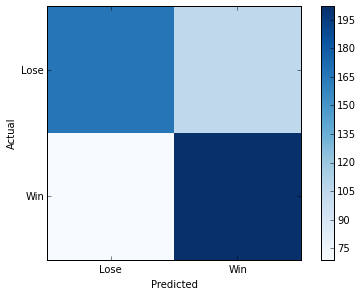

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
team_result_meta = ['Lose','Win']

predict = model.predict_classes(X)

""" Confusion matrix plot """
def plot_c_matrix(predict, actual):
    %matplotlib inline
    cm = confusion_matrix(actual, predict)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print cm
    plt.imshow(cm , interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(team_result_meta))
    plt.xticks(tick_marks, team_result_meta)
    plt.yticks(tick_marks, team_result_meta)
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
#print y_test
#print predict
plot_c_matrix(predict, y_test)

In [38]:
import cPickle as pickle
# problem in serialize model, due to keras problem, model cannot be serialize
# another approaches is using get_weights , to_json of keras
# however it's required hdf5 which is difficult to install
pickle.dump(model, open('models/larh_mls_neural_net.keras','wb'),protocol=pickle.HIGHEST_PROTOCOL)

PicklingError: Can't pickle <type 'module'>: attribute lookup __builtin__.module failed

AttributeError: 'str' object has no attribute 'shape'

542/542 [==============================] - 0s     
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 